# Linear Regression

## Overview

This Jupyter Notebook intends to identify the relationships between several attributes and their effects on student performance, specifically their final grade. The kernel uses Python 3.8.5.

## Research Question

What is the effect of travel time, study time, free time, time spent going out, weekday alcohol consumption, weekend alcohol consumption, q1 grade, and q2 grade on final grade?

## Dataset

- Dataset Name: Student Performance Data Set
- Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance#
- Number of observations: 395
- Description: This dataset includes data about student performance in their mathematics class in Portuguese secondary school. The variables include (but are not limited to) study time, free time, number of absences, health status, and final grade.

## Setup

In [59]:
# imports
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from matplotlib import style
import pickle


In [60]:
# default is 10; Set to None to display all rows/cols in dataframes
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

Read in the dataset that will be cleaned and analyzed.

In [61]:
student_data = pd.read_csv("student-mat.csv", sep=";")


In [62]:
student_data

,school,sex,age,address,famsize,...,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,...,3,6,5,6,6
1,GP,F,17,U,GT3,...,3,4,5,5,6
2,GP,F,15,U,LE3,...,3,10,7,8,10
3,GP,F,15,U,GT3,...,5,2,15,14,15
4,GP,F,16,U,GT3,...,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,...,4,11,9,9,9
391,MS,M,17,U,LE3,...,2,3,14,16,16
392,MS,M,21,R,GT3,...,3,3,10,8,7
393,MS,M,18,R,LE3,...,5,0,11,12,10


In [63]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Data Cleaning

Only keep columns with information that I will be using. Rename these columns for understandability.

In [64]:
student_data = student_data[["traveltime", "studytime", "freetime", "goout", "Dalc", "Walc","G1", "G2", "G3"]]
# 
student_data.columns = ["travel_time", "study_time", "free_time", "go_out", "weekday_alc", "weekend_alc", "q1_grade", "q2_grade", "final_grade"]
# 

In [65]:
student_data

,travel_time,study_time,free_time,go_out,weekday_alc,weekend_alc,q1_grade,q2_grade,final_grade
0,2,2,3,4,1,1,5,6,6
1,1,2,3,3,1,1,5,5,6
2,1,2,3,2,2,3,7,8,10
3,1,3,2,2,1,1,15,14,15
4,1,2,3,2,1,2,6,10,10
...,...,...,...,...,...,...,...,...,...
390,1,2,5,4,4,5,9,9,9
391,2,1,4,5,3,4,14,16,16
392,1,1,5,3,3,3,10,8,7
393,3,1,4,1,3,4,11,12,10


## Data Analysis & Results

Look at some of the dataset statistics to gain a better understanding.

In [66]:
student_data.describe()

,travel_time,study_time,free_time,go_out,weekday_alc,weekend_alc,q1_grade,q2_grade,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.448101,2.035443,3.235443,3.108861,1.481013,2.291139,10.908861,10.713924,10.415190
std,0.697505,0.839240,0.998862,1.113278,0.890741,1.287897,3.319195,3.761505,4.581443
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,8.000000,9.000000,8.000000
50%,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,11.000000,11.000000,11.000000
75%,2.000000,2.000000,4.000000,4.000000,2.000000,3.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000,20.000000


Split the data into X and y datasets. I want to predict final grade based on the other columns.

In [67]:
predict_label = "final_grade"
X = np.array(student_data.drop(predict_label, axis=1))
y = np.array(student_data[predict_label])

In [68]:
# split into training and test sets (90/10 split)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

Train a **linear regression model** many times and keep the one with the highest accuracy.

In [69]:
# comment out this block to avoid retraining the model
highest_accuracy = 0
num_runs = 50
# train the model multiple times
for _ in range(num_runs):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    # fit a linear model
    reg = linear_model.LinearRegression().fit(X_train, y_train)
    accuracy = reg.score(X_test, y_test)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        with open("student_model.pickle", "wb") as f:
                # save the model in an external file
                pickle.dump(reg, f)

I now have a linear regression model that can accurately predict final grade when inputted the dependent variables: travel time, study time, free time, time spent going out, weekday alcohol consumption, weekend alcohol consumption, q1 grade, and q2 grade.

In [70]:
# load the model
pickle_in = open("student_model.pickle", "rb")
reg = pickle.load(pickle_in)

print(f"The best model had accuracy {round(highest_accuracy * 100, 2)}%")
#print(reg.coef_)
#print(reg.intercept_)

The best model had accuracy 95.05%


In [71]:
# predict grades of test inputs
pred_grades = reg.predict(X_test)
print("Compare my model's predictions to the testing set")
for i in range(len(pred_grades)):
    print("Predicted:", round(pred_grades[i], 2), "- Actual:", y_test[i])

Compare my model's predictions to the testing set
Predicted: 12.49 - Actual: 11
Predicted: 4.19 - Actual: 0
Predicted: 16.1 - Actual: 18
Predicted: 10.51 - Actual: 11
Predicted: 7.22 - Actual: 8
Predicted: 10.53 - Actual: 9
Predicted: 11.63 - Actual: 11
Predicted: 3.49 - Actual: 5
Predicted: 9.63 - Actual: 10
Predicted: 6.27 - Actual: 9
Predicted: 10.77 - Actual: 11
Predicted: 4.93 - Actual: 6
Predicted: 10.59 - Actual: 11
Predicted: 9.11 - Actual: 11
Predicted: 14.92 - Actual: 15
Predicted: 7.24 - Actual: 0
Predicted: -0.65 - Actual: 0
Predicted: 11.59 - Actual: 12
Predicted: 14.09 - Actual: 14
Predicted: 7.77 - Actual: 9
Predicted: 6.5 - Actual: 8
Predicted: 15.3 - Actual: 15
Predicted: 6.83 - Actual: 8
Predicted: 7.25 - Actual: 10
Predicted: 8.19 - Actual: 0
Predicted: 9.33 - Actual: 10
Predicted: 6.3 - Actual: 8
Predicted: 18.97 - Actual: 18
Predicted: 11.52 - Actual: 13
Predicted: 18.83 - Actual: 18
Predicted: 8.36 - Actual: 10
Predicted: -1.22 - Actual: 0
Predicted: 14.24 - Actua

Plot the final grade against each of the dependent variables.

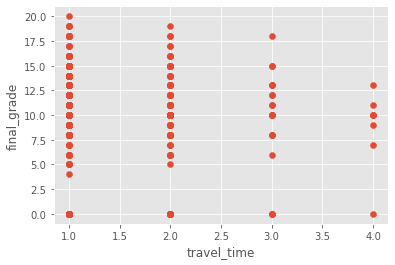

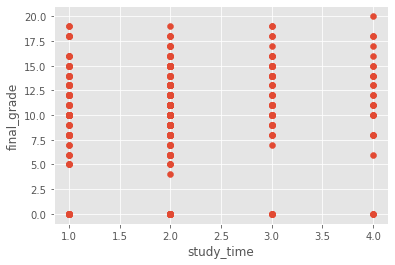

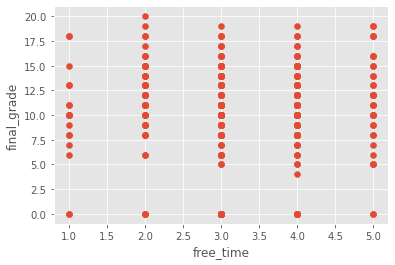

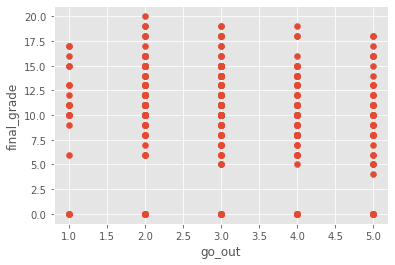

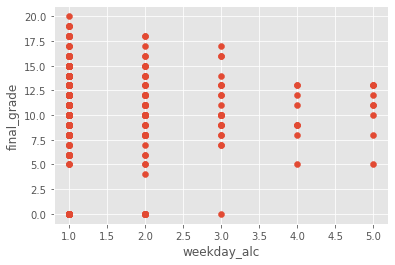

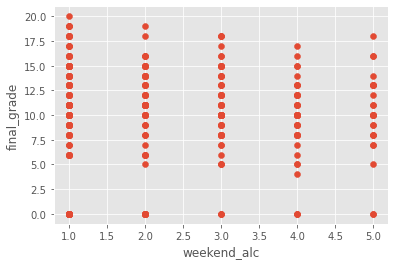

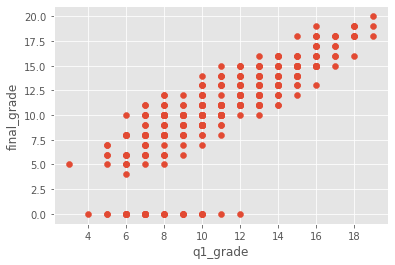

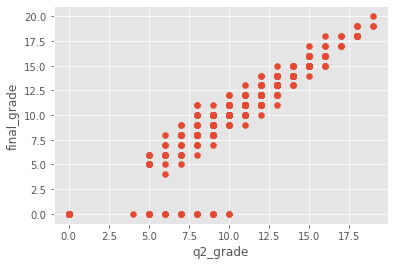

In [72]:
# build visualizations incrementally
style.use("ggplot")
for p in student_data.columns.drop(predict_label):
    plt.scatter(student_data[p], student_data[predict_label])
    plt.xlabel(p)
    plt.ylabel(predict_label)
    plt.show()

As shown in the above scatterplots, the only highly correlated relationships seem to be final grade with q1 grade, and final grade with q2 grade. The higher the q1 or q2 grade, the higher the expected final grade (positive correlation).